<a href="https://colab.research.google.com/github/mdabushad/law_of_large_numbers/blob/main/LawLargeNumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Master Python for scientific programming by solving projects
## PROJECT: The Law of Large Numbers

In [89]:
# load modules
import numpy as np
import matplotlib.pyplot as plt

# Generate a population of random numbers

In [90]:
# simulation parameters

population_size = 2.3e5

# 50 samples of 500 each
sample_size = 50
number_of_samples = 500

108.56446524669427


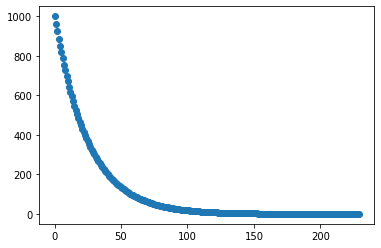

In [91]:
# generate population distribution
x = np.logspace(np.log10(0.001), np.log10(10), int(population_size))



# a population of numbers that decreases with increasing value
population = 1/x
skip = int(1e3)


# compute the true population mean
trueMean = np.mean(population)
print(trueMean)

# plot the data
plt.plot(population[::skip],'o')
plt.show()


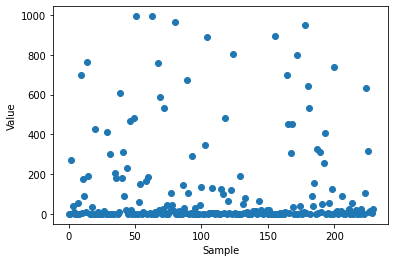

In [92]:
# shuffle the data values
np.random.shuffle(population)

plt.plot(population[::skip], 'o')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()


# Monte Carlo sampling

In [93]:
# generate one random sample from the population

np.random.choice(population)

6.5559251325631225

In [94]:
# Monte Carlo sampling for sample means

samplemeans = np.zeros(number_of_samples)

for expi in range(number_of_samples):
  random_sample = np.random.choice(population,size = sample_size)
  samplemeans[expi] = np.mean(random_sample)

samplemeans




array([116.90730287, 108.5976947 ,  97.35706741, 109.21951492,
       105.65643862,  68.50923669, 161.50434021,  68.50275163,
       132.68415066, 123.51657264,  94.57556997, 119.3295677 ,
        60.37959629,  72.37837285, 104.59980698,  89.99951176,
        95.48716261,  72.99440476,  57.88481221, 111.17982213,
       130.41589796, 145.25580379,  81.78687865, 129.03103355,
       108.25741298, 136.05572309, 108.56184349,  74.04061045,
        98.98714357, 154.37445044, 146.43465779,  93.55878395,
       101.19307335, 107.89164445, 133.331994  ,  78.44841125,
       118.35166716,  73.34164333,  55.55606705, 134.55898146,
        85.20876052,  76.38678666, 105.39422153,  94.31639232,
        58.25054772,  72.99597335,  96.36948478, 117.01263731,
        66.55565219,  91.73211763,  89.95986913, 123.44664343,
       115.14153451, 125.31840005, 186.80278329,  92.45954159,
        54.69076061,  85.23390489, 121.87393899, 120.29710089,
       154.36268585, 132.85699104, 102.34062277,  99.55

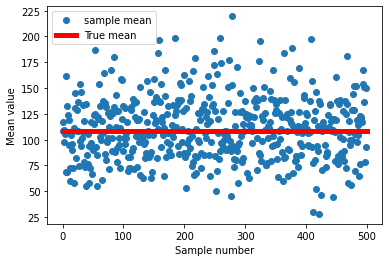

In [95]:
# plot the sample means, and a line showing the true mean
plt.plot(samplemeans, 'o',  label = 'sample mean')
plt.plot([0,number_of_samples],[trueMean,trueMean], 'r', linewidth = 5, label = 'True mean')
plt.xlabel('Sample number')
plt.ylabel('Mean value')
plt.legend()
plt.show()

# Cumulative averaging

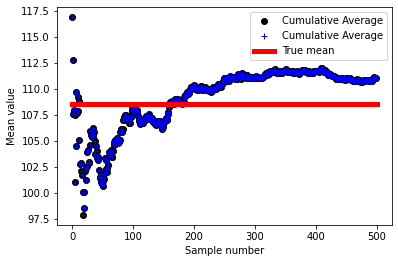

In [96]:
# Cumulative averaging
# the ith value in vector cumave is the mean of all previous points
# do this first in a loop

cum_avg = np.zeros(number_of_samples)

for i in range(number_of_samples):
  cum_avg[i] = np.mean(samplemeans[:i+1])


# then try to get the same result without a loop!
cum_avg2 = np.cumsum(samplemeans) / np.arange(1,number_of_samples+1)

# plot the results, along with a horizontal line showing the true mean
plt.plot(cum_avg, 'ko',label ='Cumulative Average')
plt.plot(cum_avg2, 'b+',label ='Cumulative Average')
plt.plot([0,number_of_samples],[trueMean,trueMean],'r',linewidth=5,label='True mean')
plt.xlabel('Sample number')
plt.ylabel('Mean value')
  
plt.legend()
plt.show()

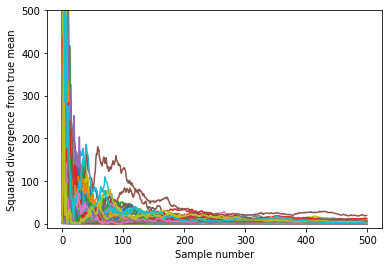

In [97]:
# compute the squared divergence from the true mean, 
# repeated over 100 iterations

meta_samples = 100
allsamplemeans = np.zeros((meta_samples,number_of_samples))

cum_avgs = np.zeros((meta_samples,number_of_samples))

for metai in range(meta_samples):
  for expi in range(number_of_samples):
    random_sample = np.random.choice(population,size = sample_size)
    samplemeans[expi] = np.mean(random_sample)

  # store sample means 
  allsamplemeans[metai,:] = samplemeans
   

# get cumulative average 
  temp = np.cumsum(samplemeans) / np.arange(1,number_of_samples+1)
  cum_avgs[metai,:] = (temp-trueMean)**2





# plot them all
plt.plot(cum_avgs.T)
plt.xlabel('Sample number')
plt.ylabel('Squared divergence from true mean')
plt.ylim([-10,500])
plt.show()


# Bonus: The Central Limit Theorem

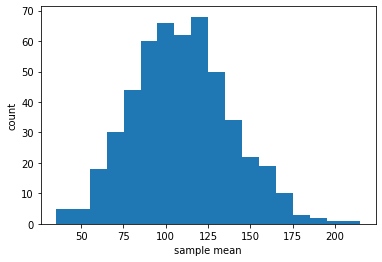

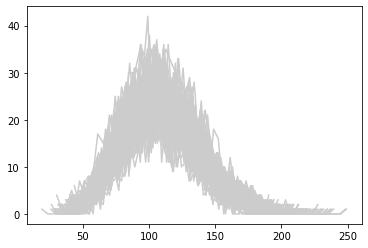

In [99]:
# create a histogram of one distribution of sample means

plt.hist(samplemeans, bins = 'fd')
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()


# then show the histogram lines for all 100 iterations of sample means
nbins = 50
x = np.zeros((nbins,meta_samples))
y = np.zeros((nbins,meta_samples))

for i in range(meta_samples):
  y,x = np.histogram(allsamplemeans[i,:], bins = nbins)
  x = (x[1:]+x[:-1])/2
  plt.plot(x,y, color = [0.8,0.8,0.8])


